<a href="https://colab.research.google.com/github/alicodes-dotcom/PracticeProjects/blob/main/ML1_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [97]:
##Load and review Data

In [98]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pluralSight/MachineLearningPython.JerryKurata-master/Notebooks/data/pima-data.csv")

In [99]:
df.shape

(768, 10)

In [100]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [101]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [102]:
df.isnull().values.any()

False

In [103]:
def plot_corr(df, size=11):
  """
  Displays: Matrix of correlation between columns.
  expect a Darkered.
  """
  corr = df.corr()  #Dataframe correlation function
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr) #colour code the rectangles correlation values
  plt.xticks(range(len(corr.columns)),corr.columns)   #Draw x tick marks
  plt.yticks(range(len(corr.columns)),corr.columns)  #Draw y tick marks

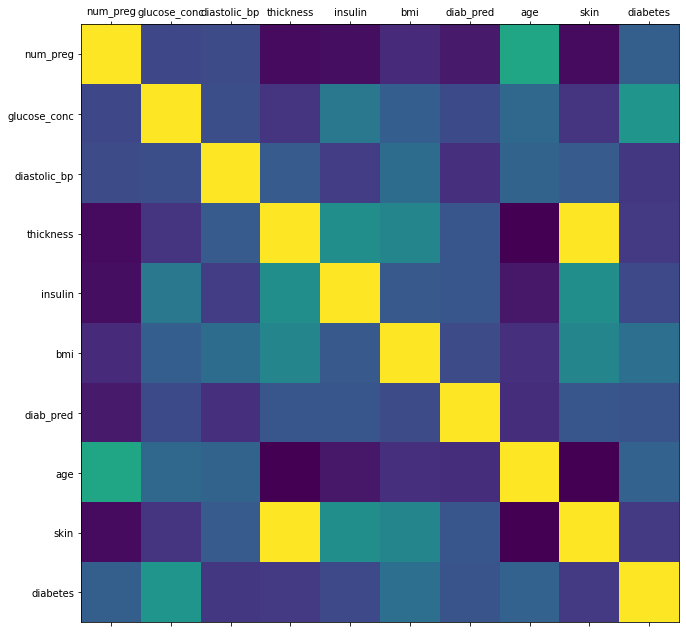

In [104]:
plot_corr(df)

In [105]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [106]:
del df['skin']

In [107]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


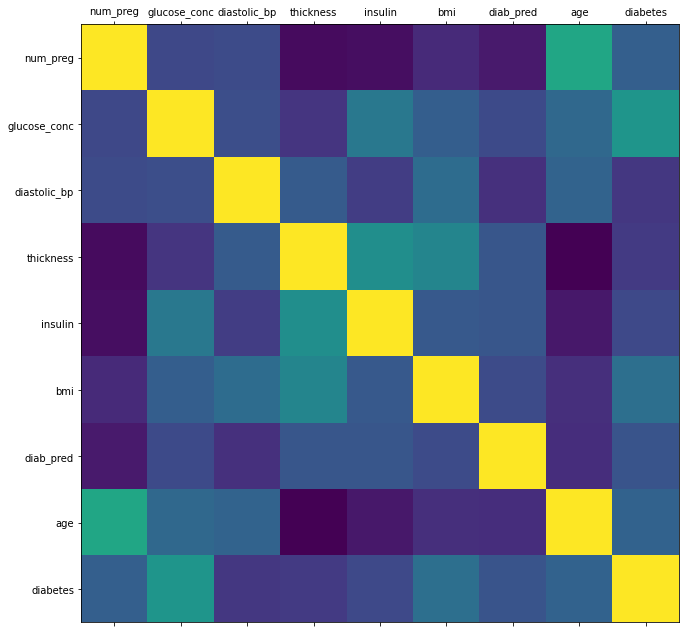

In [108]:
plot_corr(df)

#CHANGING TRUE TO 1 AND FALSE TO 0


In [109]:
diabetes_map = {True:1, False:0}

In [110]:
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [111]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
num_true = len(df.loc[df['diabetes']== True])
num_false = len(df.loc[df['diabetes']==False])

print("perc of true: {0},({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("perc of false: {0},({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

perc of true: 268,(34.90%)
perc of false: 500,(65.10%)


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_class_names].values

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state = 42)

In [115]:
print("{0:0.2f}% of training set".format((len(x_train)/len(df.index))* 100))
print("{0:0.2f}% of testing set".format((len(x_test)/len(df.index))* 100))

69.92% of training set
30.08% of testing set


In [116]:
from sklearn.impute import SimpleImputer

#Solving the problem of missing values , or 0.

In [117]:
#impute with mean from all zero values

fill_0 = SimpleImputer( missing_values=0, strategy= "mean")

In [118]:
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
#PREDICT VALUES USING TRAINING DATA
nb_predict_train = nb_model.predict(x_train)

#IMPORT THE PERFORMANCE METRICS LIBARY
from sklearn import metrics

#find ACCURACY
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))


Accuracy: 0.7542


In [122]:
#PREDICT VALUES USING TESTING DATA
nb_predict_test = nb_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


In [123]:
print("CONFUSION MATRIX")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("CLASSIFICATION REPORT")
print(metrics.classification_report(y_test, nb_predict_test))


CONFUSION MATRIX
[[118  33]
 [ 28  52]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



#USING DIFFERNT ALGORITHM : RANDOM FOREST

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model = RandomForestClassifier(random_state=42) # creating random forest object
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#PREDICT TRAINING SET

In [126]:
rf_predict_train = rf_model.predict(x_train)

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


#PREDICT TESTING SET

In [127]:
rf_predict_test = rf_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [128]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")

print(metrics.classification_report(y_test, rf_predict_test))

[[119  32]
 [ 28  52]]

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



#NEW ALGORITHM LOGISTIC REGRESSION

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr_model = LogisticRegression(C=0.7, random_state=42)

lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

#TRAINING METRICS
print("Accuracy: {0:.04f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print(metrics.confusion_matrix(y_test, lr_predict_test))

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7489
[[125  26]
 [ 32  48]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#SETTING THE REGULARIZATION PARAMETER 'C' VALUE USING WHILE LOOP.

1st Max value of 0.588 occured at C=0.100


Text(0, 0.5, 'recall_scores')

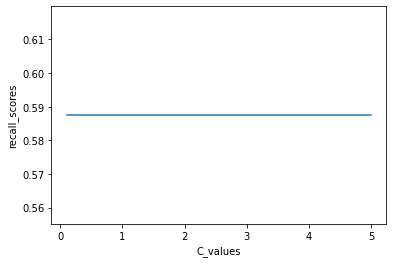

In [131]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
  C_values.append(C_val)
  lr_model_loop = LogisticRegression(C=C_val, random_state=42, max_iter=500)

  lr_model_loop.fit(x_train, y_train.ravel())
  lr_predict_loop_test = lr_model_loop.predict(x_test)
  recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
  recall_scores.append(recall_score)
  if (recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test

  C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st Max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C_values")
plt.ylabel("recall_scores")



1st Max value of 0.588 occured at C=0.100


Text(0, 0.5, 'recall_scores')

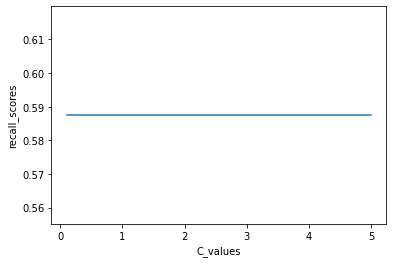

In [132]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
  C_values.append(C_val)
  lr_model_loop = LogisticRegression(C=C_val, class_weight='Balanced', random_state=42, max_iter=500)

  lr_model_loop.fit(x_train, y_train.ravel())
  lr_predict_loop_test = lr_model_loop.predict(x_test)
  recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
  recall_scores.append(recall_score)
  if (recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test

  C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st Max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C_values")
plt.ylabel("recall_scores")



In [134]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='Balanced', C= best_score_C_val, random_state=42)

lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

#TRAINING METRICS
print("Accuracy: {0:.04f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print(metrics.confusion_matrix(y_test, lr_predict_test))

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7489
[[125  26]
 [ 32  48]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#In Above: Recall[1] should be greater than 70~ 0.7 but, I got 0.60

#Another algorithm to perform cross-validation using LogisticRegressionCV

In [136]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

#predict using test data

In [137]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

#TRAINING METRICS
print("Accuracy: {0:.04f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

print(metrics.confusion_matrix(y_test, lr_cv_predict_test))

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7056
[[109  42]
 [ 26  54]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

